# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


Optimized a step.
Optimized a step.
Optimized a step.


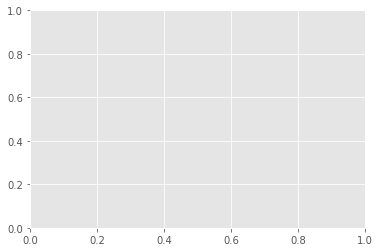

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        print(self.w)
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data_dict)


In [ ]:
svm1.predict([7,3.5])

[ 0.224 -0.224]


1.0

In [14]:
# Basic libraries.
import numpy as np
import pandas as pd
import zipfile
from pathlib import Path
import urllib.request
import numpy as np
from datetime import datetime

# Optimization
from scipy.optimize import linprog

# Machine Learning Models and Metrics.
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn import svm

# Visualization libraries.
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots

# **SOLUTION** 

**Introduction:**
In this assignment, we are gonna try to solve a Machin Learning problem using SVM, we will study the features and labels of the information we are working with, check that the datasets and their properties are ideal for our model, explain the code that it is giving to us and addapt it to our problem, give some examples to verify the proper working of the code and finally test how good was the generalization of our model.



1)Both problems are about classify new data using the information we already have, which have been classified. In the first problem, we want to use our model in banknote authentication and with the second one, we look to know about he occupation or not of a room. in both cases we have to choose between two options to classify. Then we are in front of a supervised binary classification problem.

__________________________________________________________________________________

2) Summary of the features and the labels:


1.   First problem (Banknote Authentication):


*   Features: We have the next four features:


  a). Variance of Wavelet Transformed image (continuous)


  b). Skewness of Wavelet Transformed image (continuous) 

  c). Curtosis of Wavelet Transformed image (continuous) 

  d). Entropy of image (continuous) 

  These features were extracted using the Wavelet Transform, which is a mathematical tool developed to analyze data where features vary over different scales. As we can look in the features, these take real values in a continous way.


*  Labels: We only have two labels 0 and 1. We don't have the information about the meaning of the labels, but for the purpose of this proyect we will understand the label 1 as "Genuine" and the label 0 as "Forgery".



2.   Second Problem (Occupancy Detection):


*   Features: For the second probem we have seven features, these are:

a). Date time year-month-day.

b). Hour:minute:second.

c). Temperature, in Celsius.

d). Relative Humidity, % 

e). Light, in Lux 

f). CO2, in ppm 

g). Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 


*   Labels: Here we have again to labels: 0 and 1. In this problem we understand 0 as "not occupied" and 1 as"occupied".





3) 
a. We will study both datasets using the perceptron method. This method allow us to check if the datasets are linearly separable because it is a linear classifier. Therefore if we use the method over all the training data and then we test its accuracy against the training data again, we will get an accuracy of 100 per cent only if the data set is linearly separable. Following this idea we import the perceptron method from sklearn and implement the next code:

In [10]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", 
                 sep = ',', 
                 header = None, 
                 names=["variance_of_Wavelet","skewness_of_Wavelet",
                        "curtosis_of_Wavelet","entropy",
                        "class"],
                 thousands = ',')
variables=["date","temperature", "curtosis_of_Wavelet","entropy"]


train_set_df, test_set_df= train_test_split(df, test_size=0.2,random_state=42)

#Definition of the features X and the labels y for training
X=train_set_df[['variance_of_Wavelet', 'skewness_of_Wavelet', 'curtosis_of_Wavelet','entropy']]
y=train_set_df["class"]
#df.keys()

 #Definition of the features X_test and the labels y_test for testing
X_test=test_set_df[['variance_of_Wavelet', 'skewness_of_Wavelet', 'curtosis_of_Wavelet','entropy']]
y_test=test_set_df['class']



In [11]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn import svm


clf_p = Perceptron(tol=1e-3, random_state=0)
clf_p.fit(X, y)
print('Accuracy training set:')


clf_p.score(X, y)


predicted_perceptron_test=clf_p.predict(X_test)

#Accuracy measure for the testing dataset

accuracy_test= accuracy_score(y_test, predicted_perceptron_test).round(2)
conf_matrix_test= confusion_matrix(y_test, predicted_perceptron_test)

print('Accuracy testing set:',accuracy_test)
print('Confusion matrix:\n', conf_matrix_test)

Accuracy training set:
Accuracy testing set: 0.95
Confusion matrix:
 [[145   3]
 [ 12 115]]


In this first block of code we observe that the accuracy is 95 per cent, so we can conclude that the dataset for the first problem isn't linearly separable. Now for the second problem we have to save the data and also transform the date to a number we can work with:


In [15]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

def load_occupancy_data():
    tarball_path = Path("datasets/occupancy_data.zip")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip"
        urllib.request.urlretrieve(url, tarball_path)
        with zipfile.ZipFile(tarball_path) as occupancy_tarball:
           # open the csv file in the dataset
           occupancy_tarball.extractall(path="datasets")
    list_df =[pd.read_csv(Path("datasets/datatraining.txt"),parse_dates=['date'],date_parser=dateparse),
              pd.read_csv(Path("datasets/datatest.txt"),parse_dates=['date'],date_parser=dateparse),
              pd.read_csv(Path("datasets/datatest2.txt"),parse_dates=['date'],date_parser=dateparse),]
    return list_df

train, test1, test2= load_occupancy_data()

train['date_numeric'] = train['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)
test1['date_numeric'] = test1['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)
test2['date_numeric'] = test2['date'].apply(lambda time: time.year+time.month/12+ time.day/365 + time.hour/8760+time.minute/525600)

We will only observe if the train data and test 1 is separable or not, after all, we should keep a set of test data to work after all.

In [17]:
X_train_o=train[['date_numeric', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
y_train_o=train['Occupancy']
X_test1_o=test1[['date_numeric', 'Temperature', 'Humidity', 'Light', 
              'CO2', 'HumidityRatio']]
y_test1_o=test1['Occupancy']
clf_p = Perceptron(tol=1e-3, random_state=0)
clf_p.fit(X_train_o, y_train_o)
print('Accuracy training set:')
clf_p.score(X_train_o, y_train_o)

predicted_perceptron_test1_o=clf_p.predict(X_test1_o)
print('Accuracy testing set 1:')
clf_p.score(X_test1_o, y_test1_o)

conf_matrix_test1_o= confusion_matrix(y_test1_o, predicted_perceptron_test1_o)

accuracy_test= accuracy_score(y_test1_o, predicted_perceptron_test1_o).round(2)
#print('Acuracy:',accuracy_test1_o)
print('Accuracy testing set:',accuracy_test)
print('Confusion matrix:\n', conf_matrix_test1_o)

Accuracy training set:
Accuracy testing set 1:
Accuracy testing set: 0.95
Confusion matrix:
 [[1648   45]
 [  79  893]]


We can observe that we again get a value different from 100% accuracy, so we can conclude that the dataset from the second problem isn't linearly separable.

3. b) The datasets are not randomly chosen because the data was selected using an especific method. In the first datesets, the vectors are created selecting the specimens as genuine and forged banknote-like objetcs, with a formar of 400 x 400 pixels and using a Wavelet transform to extract the features we observe.

In the second case, we have the same problem, the data are not rndomly chosen, because we are testing the occupation of an specific room. There is certain level of control over the variables of the experiment from which, we are getting the data.



3. c) We can never guarantee generalization, the only thing we can guarantee when the dataset is big enough, is a high propability that the error produced by our hypothesis is small. After all we don't known which is the generalization function we are aiming for.

4). Using the first code example given at the begining, I have modified the code to get the next algorithm for my SVM.

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
#First we import the libraries which the tools and functions we will need.
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

#Here we will create our SVM
class Support_Vector_Machine:
    def __init__(self, visualization=False):
      self.visualization = visualization
      self.colors = {1:'r',-1:'b'}
      if self.visualization:
          self.fig = plt.figure()
          self.ax = self.fig.add_subplot(1,1,1)
#I have removed the visualization parameter because we are going to work with vectors in R^4
    # train
    #In fit the last parameter t, is a new parameter that we use to limit the number of hyperplanes we will check. If t is small we will check 
    #more hyperplanes and the code will run slower 
    def fit(self, data, t=45):
      self.data = data
      # { ||w||: [w,b] }
      opt_dict = {}

      #transforms: We will use theses to change w and check different possibilities for the Hyperplane, here we use t.
      r= (t*np.pi)/180
      transforms = [] #In this list we will place all the transformation that we will use
      for angulo1 in np.arange(0 , 2*np.pi , r):
        for angulo2 in np.arange(0 , 2*np.pi , r):
          for angulo3 in np.arange(0 , 2*np.pi , r):
            transforms.append([np.cos(angulo1),np.sin(angulo1)*np.cos(angulo2),np.sin(angulo1)*np.sin(angulo2)*np.cos(angulo3),
                            np.sin(angulo1)*np.sin(angulo2)*np.sin(angulo3)]) #We are using different points in a 4 dimensional sphere to define the transformations


#Here we list all the data in a single list without distingish among features 
      all_data = []
      for yi in self.data:
          for featureset in self.data[yi]:
              for feature in featureset:
                  all_data.append(feature)
#We take the maximun and minimun value among the values of all the features
      self.max_feature_value = max(all_data)
      self.min_feature_value = min(all_data)
      all_data = None

      # support vectors yi(xi.w+b) = 1
      
#We define the size of the sets we are going to use in each iteration
      step_sizes = [self.max_feature_value * 0.1,
                    self.max_feature_value * 0.01,
                    # point of expense:
                    self.max_feature_value * 0.001,]

      
      
      # extremely expensive
      b_range_multiple = 5
      # we dont need to take as small of steps
      # with b as we do w
      b_multiple = 5
      latest_optimum = self.max_feature_value*10

      #Here we begin the process to get good values for b and w
      for step in step_sizes:
          #We begin with an arbitrary w using the greatest value aomng the features
          w = np.array([latest_optimum,latest_optimum,latest_optimum,latest_optimum])
          # we can do this because convex
          optimized = False
          #The while repeats itself until it has tested all possible configuration
          while not optimized:
            
              for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                  self.max_feature_value*b_range_multiple,
                                  step*b_multiple):
                  for transformation in transforms:
                      w_t = w*transformation
                      found_option = True
                      # weakest link in the SVM fundamentally
                      # SMO attempts to fix this a bit
                      # yi(xi.w+b) >= 1
                      # 
                      # #### add a break here later..
                      for i in self.data:
                          for xi in self.data[i]:
                              yi=i
                              # Verify constraints
                              if not yi*(np.dot(w_t,xi)+b) >= 1:
                                  found_option = False
                                  
                      if found_option:
                          # Computes norm
                          opt_dict[np.linalg.norm(w_t)] = [w_t,b]

              #Here we test that we have proved all values of w
              if w[0] < 0:
                  optimized = True
                  print('Optimized a step.')
              else:
                  w = w - step

          norms = sorted([n for n in opt_dict])
          #||w|| : [w,b]
          opt_choice = opt_dict[norms[0]]
          self.w = opt_choice[0]
          self.b = opt_choice[1]
          latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification]) #This is useful to visualize when we are working in spaces of diemnsion 2
        return classification

        




5) Then we use the next little set of data to test that the algorithm is working in the hoped way:

In [2]:
data_dict = {-1:np.array([[1,2,3,4],
                          [2,3,4,5],
                          [3,4,5,6]]),
             
             1:np.array([[-1,-2,-3,-4],
                          [-2,-3,-4,-5],
                          [-3,-4,-5,-6]])}

svm = Support_Vector_Machine()
svm.fit(data_dict,45)

predict_us = [[4,5,6,7],[-4,-5,-6,-7],[0,0,0,1]]

for p in predict_us:
    print(svm.predict(p))


Optimized a step.
Optimized a step.
Optimized a step.
-1.0
1.0
-1.0


6. To show cuantitative evidence of generalization we have to split the data set in two: a train dataset and a test dataset. We have already done that in our verification that the data was linearly separable.

However the code we have created takes to long and it isn't optimized, so we will left the last point without solution with our in this case and we will look the output of a SVM from Sklearn.

In [12]:
clf= svm.SVC()
clf.fit(X, y)

predicted_svm= clf.predict(X)
predicted_svm_test=clf.predict(X_test)

accuracy_train= accuracy_score(y, predicted_svm).round(2)
conf_matrix_train= confusion_matrix(y , predicted_svm)

accuracy_test= accuracy_score(y_test, predicted_svm_test).round(2)
conf_matrix_test= confusion_matrix(y_test, predicted_svm_test)

print('Accuracy:',accuracy_test)
print('Confusion matrix:\n', conf_matrix_test)

Accuracy: 1.0
Confusion matrix:
 [[148   0]
 [  0 127]]


In [18]:
X_test2_o=test2[['date_numeric', 'Temperature', 'Humidity', 'Light', 
              'CO2', 'HumidityRatio']]
y_test2_o=test2['Occupancy']

clf= svm.SVC()
clf.fit(X_train_o, y_train_o)

predicted_svm= clf.predict(X_train_o)
predicted_svm_test=clf.predict(X_test2_o)

accuracy_train= accuracy_score(y_train_o, predicted_svm).round(2)
conf_matrix_train= confusion_matrix(y_train_o, predicted_svm)

accuracy_test= accuracy_score(y_test2_o, predicted_svm_test).round(2)
conf_matrix_test= confusion_matrix(y_test2_o, predicted_svm_test)

print('Accuracy:',accuracy_test)
print('Confusion matrix:\n', conf_matrix_test)

Accuracy: 0.99
Confusion matrix:
 [[7566  137]
 [   8 2041]]


We can see something really interesting here.In the point 3 we use the perceptron method to prove if the dataset was linealy separable or not, and we conclude that it wasn't. However at the end using SVM, we get an accuracy of 100%,i the first problem. We can get that only if the dataset is linearly separable. Then our observation with the perceptron was wrong. On the other side the accuracy in the second problom was also higher than the expected.

Referencias: 


*   https://www.mathworks.com/discovery/wavelet-transforms.html

